# Looking at the data

## *Goals*:

1. Make a histogram of the categories of images. How unbalanced are the categories?
2. Show a few examples from each category

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from PIL import Image

## Load in the cleaned listing .csv file and visualize the dataframe.

In [9]:
#df = pd.read_csv("./etsy_1000_listings_categorized.csv", index_col=0)
df = pd.read_csv("./etsy_finallistings_cleaned_test.csv")

In [10]:
df.head()

,category,listing_id,materials,price,url
0,BeadedNecklaces,737243546,['natural stone chip beads'],16.00,https://www.etsy.com/listing/737243546/multi-s...
1,BeadedNecklaces,247488382,"['Black Jasper', 'Green Aventurine', 'Green Tu...",39.00,https://www.etsy.com/listing/247488382/green-h...
2,MonogramNameNecklaces,294848103,['Stainless Steel'],8.99,https://www.etsy.com/listing/294848103/initial...
3,BeadedNecklaces,559976155,"['Gemstone', 'Glass', 'Silver filled']",125.00,https://www.etsy.com/listing/559976155/artisan...
4,Charm,501180185,['Titanium'],14.95,https://www.etsy.com/listing/501180185/basebal...


In [11]:
categories = ['Chokers','Crystal','BeadedNecklaces',\
              'MonogramNameNecklaces','Charm',\
              'Other','Pendants']

## Make a histogram of the categories

Number of listings: 33221


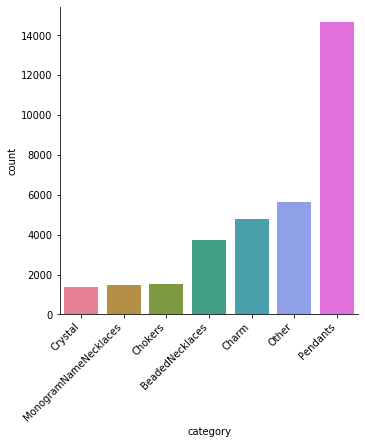

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

chart = sns.catplot(x="category",kind="count",data=df,palette="husl",\
                    order=df['category'].value_counts().sort_values().index);
chart.set_xticklabels(
#    chart.get_xlabels(),
    rotation=45,
    horizontalalignment='right');

chart.savefig('category_visualization.jpg',dpi=400)

print("Number of listings: "+str(sum(df['category'].value_counts())))

Wow, the data is very unbalanced. Making a mental note for later when needing to balance categories for model training.

## Writing the code separately to look at pictures of necklaces according to category

In [140]:
# Grab 2 (or 1) listing_ids from each category
picind = 310
allinds = {}
onlytwoinds = {}
test_list = df.category.values
listids = df.listing_id.values
for cat in categories:
    allinds[cat] = [listids[i] for i in range(len(test_list)) if test_list[i] == cat]
#    onlytwoinds[cat] = allinds[cat][picind:picind+2]
    onlytwoinds[cat] = allinds[cat][picind:picind+1]

In [141]:
onlytwoinds

{'Chokers': [760791666],
 'Crystal': [264733823],
 'BeadedNecklaces': [759586502],
 'MonogramNameNecklaces': [562374231],
 'Charm': [233319927],
 'Other': [594158240],
 'Pendants': [722560991]}

In [142]:
#for cat in categories:
#    onlytwoinds[cat]=[str(onlytwoinds[cat][x])+".jpg" for x in [0,1]]
onlytwoinds=[str(onlytwoinds[cat][0])+".jpg" for cat in categories]

In [143]:
onlytwoinds

['760791666.jpg',
 '264733823.jpg',
 '759586502.jpg',
 '562374231.jpg',
 '233319927.jpg',
 '594158240.jpg',
 '722560991.jpg']

In [144]:
image_path = '/Users/eleanor/Dropbox/Documents/Career.NewJob/insightproject/repo/data/all_images_throwaway_too/'

## Look at an example image from each category

In [148]:
def plot_necklaces(picind):
    allinds = {}
    onlytwoinds = {}
    test_list = df.category.values
    listids = df.listing_id.values
    
    # Extract listings according to some id
    for cat in categories:
        allinds[cat] = [listids[i] for i in range(len(test_list)) if test_list[i] == cat]
    #    onlytwoinds[cat] = allinds[cat][picind:picind+2]
        onlytwoinds[cat] = allinds[cat][picind:picind+1]
    
    # Transform to a filename
    onlytwoinds=[str(onlytwoinds[cat][0])+".jpg" for cat in categories]
    
    
    n_items = 6
    columns = 3
    rows = int(np.ceil(n_items+1/columns))+1
    fig=plt.figure(figsize=(2*rows, 3*rows))   
#    fig.set_size_inches(15, 15)
#    fig.subplots_adjust(wspace=0, hspace=0)
    for i in range(1, columns*rows +1):
        if i<n_items+2:
            img = Image.open(image_path+str(onlytwoinds[i-1]))
            rsize = img.resize((500,500))
#            img = plt.imread(image_path+str(onlytwoinds[i-1]))
            fig.add_subplot(rows, columns, i)
            plt.title(categories[i-1])
            plt.imshow(rsize)
            plt.axis('off')
#            plt.margins(0,0)
#            plt.gca().xaxis.set_major_locator(plt.NullLocator())
#            plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig("./category_examples_"+str(picind)+".jpg",format='jpg',dpi=400,bbox_inches = 'tight',pad_inches = 0)
    plt.show()
#     plt.imsave(cat+".png",img)

*Some of these will be hard for the model to identify as necklaces. For example, it's unlikely that the necklace labeled as "__Chokers__" is going to be returned based on a user-provided image because of its very noisy background. Instead, a necklace like the one labeled as "__Charm__" would likely be returned, assuming a user will probably upload a picture of a necklace worn on someone else.*  
  
*Furthermore, one can already see how, despite attempting to remove non-necklaces upon scraping, some non-necklaces still exist within the data. The model will likely be confused by the necklaces labeled "__Pendants__", because that is indeed an image of a pendant - not a necklace.*

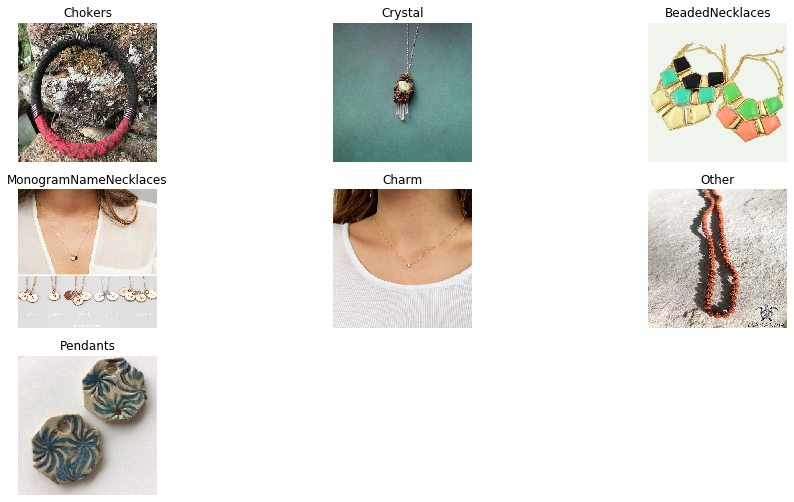

In [150]:
plot_necklaces(251)